<a href="https://colab.research.google.com/github/mahsimaheydarii/colab/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
import sklearn.feature_selection as fs
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pointbiserialr
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from math import sqrt


In [ ]:
#IMPORT DATASETS
from google.colab import drive
drive.mount('/content/drive')

df1 = pd.read_csv('drive/MyDrive/NASA/CM1.csv')
df2 = pd.read_csv('drive/MyDrive/NASA/KC1.csv')
df3 = pd.read_csv('drive/MyDrive/NASA/KC3.csv')
df4 = pd.read_csv('drive/MyDrive/NASA/MC2.csv')
df5 = pd.read_csv('drive/MyDrive/NASA/MW1.csv')
df6 = pd.read_csv('drive/MyDrive/NASA/PC1.csv')
df7 = pd.read_csv('drive/MyDrive/NASA/PC2.csv')
df8 = pd.read_csv('drive/MyDrive/NASA/PC3.csv')
df9 = pd.read_csv('drive/MyDrive/NASA/PC4.csv')
warnings.filterwarnings('ignore')
df1.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,6,9,2,1,0,16,5,0.20,8,2,...,0.16,19,44,15,15,32,1,4.00,25,N
1,15,7,3,1,19,12,4,0.13,6,2,...,0.06,51,90,32,27,67,1,39.22,32,Y
2,27,9,1,4,22,16,5,0.15,8,2,...,0.06,37,74,33,22,83,1,47.27,33,Y
3,1,1,2,0,0,0,1,0.14,0,?,...,0.11,5,6,5,4,9,1,0.00,7,N
4,7,3,2,0,0,4,2,0.17,2,2,...,0.10,9,14,7,10,20,1,0.00,12,N


In [ ]:
#we can see the number of instances and attributes of each dataset
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

# Print the shape of each dataframe
for i, df in enumerate(dataframes, 1):
    print(f"Shape of df{i}: {df.shape}")


Shape of df1: (505, 41)
Shape of df2: (2107, 22)
Shape of df3: (458, 41)
Shape of df4: (161, 41)
Shape of df5: (403, 41)
Shape of df6: (1107, 41)
Shape of df7: (5589, 41)
Shape of df8: (1563, 41)
Shape of df9: (1458, 41)


In [ ]:
df_reference = pd.DataFrame(np.ones_like(df1.values), columns=df1.columns)
df_reference.head(10)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
def calculate_grey_incidence(C0, Xi):
    """
    Calculates the absolute grey incidence degree ε0i between a reference sequence C0 and a comparison sequence Xi.

    Args:
        C0 (pd.DataFrame): Reference sequence with all 1s.
        Xi (pd.DataFrame): Comparison sequence to be compared with C0.

    Returns:
        float: The absolute grey incidence degree ε0i.
    """
    # Convert non-numeric values to numeric, coerce errors
    C0_numeric = C0.apply(pd.to_numeric, errors='coerce')
    Xi_numeric = Xi.apply(pd.to_numeric, errors='coerce')

    # Handle NaN values (e.g., fill with 0 or drop rows, depending on your requirements)
    C0_numeric = C0_numeric.fillna(0)  # Example: Fill NaNs with 0
    Xi_numeric = Xi_numeric.fillna(0)  # Adjust as needed

    # Perform calculations after handling NaNs
    C0_0 = C0_numeric - C0_numeric.iloc[0]
    Xi_0 = Xi_numeric - Xi_numeric.iloc[0]


    S0_prime = abs(C0_0.iloc[1:-1].sum() + 0.5 * C0_0.iloc[-1])
    Si_prime = abs(Xi_0.iloc[1:-1].sum() + 0.5 * Xi_0.iloc[-1])

    epsilon = (1 + S0_prime + Si_prime) / (1 + S0_prime + Si_prime + abs(Si_prime - S0_prime))

    return epsilon


reference_dataset = pd.DataFrame(np.ones_like(df1.values), columns=df1.columns) # Create reference dataset with all 1s


epsilon1 = calculate_grey_incidence(reference_dataset, df1)
epsilon2 = calculate_grey_incidence(reference_dataset, df2)
epsilon3 = calculate_grey_incidence(reference_dataset, df3)
epsilon4 = calculate_grey_incidence(reference_dataset, df4)
epsilon5 = calculate_grey_incidence(reference_dataset, df5)
epsilon6 = calculate_grey_incidence(reference_dataset, df6)
epsilon7 = calculate_grey_incidence(reference_dataset, df7)
epsilon8 = calculate_grey_incidence(reference_dataset, df8)
epsilon9 = calculate_grey_incidence(reference_dataset, df9)

epsilons = []
# Calculate epsilons for each DataFrame
for i in range(1, 10):
    df = globals()[f"df{i}"]  # Access DataFrame dynamically using its name
    epsilon = calculate_grey_incidence(reference_dataset, df)
    epsilons.append(epsilon)
# Create a DataFrame with epsilon values as a row
epsilon_row = pd.DataFrame([epsilon], columns=df.columns)

# Calculate the average epsilon for each column across all DataFrames
average_epsilons = pd.DataFrame(np.mean(epsilons, axis=0), index=df.columns, columns=['Average_Epsilon'])
print("avarage epsilon: ",average_epsilons)


# Concatenate the epsilon row with each original DataFrame
df1 = pd.concat([df1, epsilon_row], ignore_index=True)
df2 = pd.concat([df2, epsilon_row], ignore_index=True)
df3 = pd.concat([df2, epsilon_row], ignore_index=True)
df4 = pd.concat([df2, epsilon_row], ignore_index=True)
df5 = pd.concat([df2, epsilon_row], ignore_index=True)
df6 = pd.concat([df2, epsilon_row], ignore_index=True)
df7 = pd.concat([df2, epsilon_row], ignore_index=True)
df8 = pd.concat([df2, epsilon_row], ignore_index=True)
df9 = pd.concat([df2, epsilon_row], ignore_index=True)

print("Dataset 1 epsilon:", epsilon1)
print("Dataset 2 epsilon:", epsilon2)
print("Dataset 3 epsilon:", epsilon3)
print("Dataset 4 epsilon:", epsilon4)
print("Dataset 5 epsilon:", epsilon5)
print("Dataset 6 epsilon:", epsilon6)
print("Dataset 7 epsilon:", epsilon7)
print("Dataset 8 epsilon:", epsilon8)
print("Dataset 9 epsilon:", epsilon9)

avarage epsilon:                                   Average_Epsilon
LOC_BLANK                               0.500038
BRANCH_COUNT                            0.588153
LOC_CODE_AND_COMMENT                    0.587750
LOC_COMMENTS                            0.500077
CYCLOMATIC_COMPLEXITY                   0.587630
DESIGN_COMPLEXITY                       0.587687
ESSENTIAL_COMPLEXITY                    0.588002
LOC_EXECUTABLE                          0.501878
HALSTEAD_CONTENT                        0.587651
HALSTEAD_DIFFICULTY                     0.575743
HALSTEAD_EFFORT                         0.587759
HALSTEAD_ERROR_EST                      0.500437
HALSTEAD_LENGTH                         0.587652
HALSTEAD_LEVEL                          0.575687
HALSTEAD_PROG_TIME                      0.576015
HALSTEAD_VOLUME                         0.500021
NUM_OPERANDS                            0.500064
NUM_OPERATORS                           0.511449
NUM_UNIQUE_OPERANDS                     0.512823
NU

In [ ]:

df1.shape

(506, 41)

----------------------------------------------- proposed naive bayes Table -----------------------------------------------
Sorted DataFrame:
     LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
415         81           162           8                    80           165   
23         164           110          26                    37           191   
37         155            71           5                    14           170   
277         49            41          14                    16            37   
147         42           141          24                    45           339   
..         ...           ...         ...                   ...           ...   
493          7             5           1                     2             0   
314          1             5           0                     0             0   
307          1             5           0                     0             0   
321          1             5           0                   

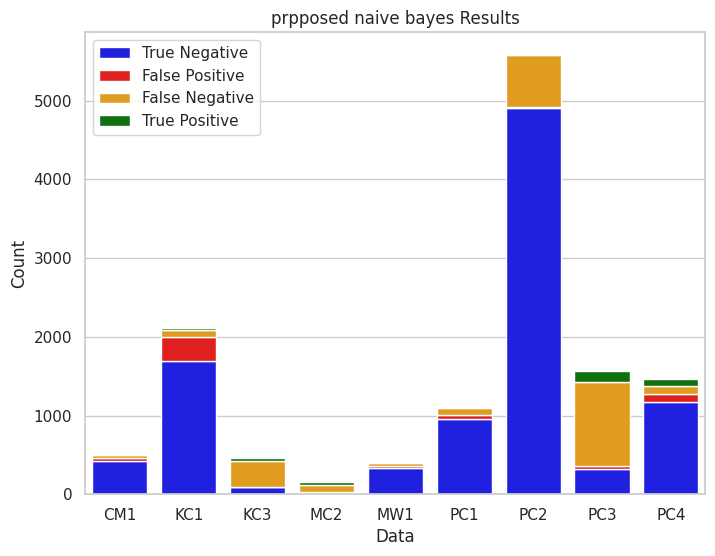

In [ ]:

def naive_bayes_proposed(df):
    # Replace any non-numeric values
    replacements = {'?': -100, 'Y': 1, 'N': 0}
    df = df.replace(replacements)

    # Separate features and target variable
    X = df.drop('Defective', axis=1)
    y = df['Defective']

    # Apply grey incidence analysis to the original features
    X_grey_incidence = calculate_grey_incidence(X)


    # Apply min-max normalization to features
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X_grey_incidence)

    # Feature selection using SelectKBest
    selector = SelectKBest(f_classif, k=20)
    X_selected = selector.fit_transform(X_normalized, y)

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)

    # Split the data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Instantiate the Naive Bayes classifier
    gnb = GaussianNB()

    # Fit the model on the training data
    gnb.fit(X_selected,y)

    # Make predictions on the test set
    y_pred = gnb.predict(X_selected)


    # Create a confusion matrix
    #confusion_matrix = pd.crosstab(df['Defective'], y_pred)

    # Create a confusion matrix
    cm = confusion_matrix(y , y_pred)

    # Extract TP, TN, FP, FN
    tn, fn, fp, tp = cm.ravel()

    # Calculate and print additional metrics (Precision, Recall, F1-score)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    PD = tp / (tp + fn)
    PF = fp / (fp + tn)
    accuracy = accuracy_score(y, y_pred)


    return tn, fn, fp, tp, PD, PF, precision, recall, f1_score, accuracy

print("----------------------------------------------- proposed naive bayes Table -----------------------------------------------")

# return value and make Table
tn_list=[]
fn_list=[]
fp_list=[]
tp_list=[]
Table=PrettyTable(["Data","True Negative proposed", "False Positive proposed", "False Negative proposed", "True Positive proposed","PD", "PF", "Precision", "Recall", "f_measure", "accuracy"])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df1)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["CM1",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df2)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["KC1",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df3)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["KC3",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df4)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["MC2",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df5)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["MW1",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df6)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC1",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df7)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC2",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df8)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC3",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes_proposed(df9)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC4",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
print(Table)

data = {'Data': ['CM1', 'KC1', 'KC3', 'MC2', 'MW1', 'PC1', 'PC2', 'PC3', 'PC4']}
data.update({'True Negative proposed':tn_list})
data.update({'False Negative proposed':fn_list})
data.update({'False Positive proposed':fp_list})
data.update({'True Positive proposed':tp_list})
df = pd.DataFrame(data)


# Plot the table using seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=df, x='Data', y='True Negative', color='blue', label='True Negative')
ax = sns.barplot(data=df, x='Data', y='False Positive', color='red', bottom=df['True Negative'], label='False Positive')
ax = sns.barplot(data=df, x='Data', y='False Negative', color='orange', bottom=df['True Negative']+df['False Positive'], label='False Negative')
ax = sns.barplot(data=df, x='Data', y='True Positive', color='green', bottom=df['True Negative']+df['False Positive']+df['False Negative'], label='True Positive')

plt.xlabel('Data')
plt.ylabel('Count')
plt.title('prposed naive bayes Results')
plt.legend()
plt.show()

+------+---------------+----------------+----------------+---------------+---------------------+-----------------------+---------------------+---------------------+---------------------+---------------------+
| Data | True Negative | False Positive | False Negative | True Positive |          PD         |           PF          |      Precision      |        Recall       |      f_measure      |       accuracy      |
+------+---------------+----------------+----------------+---------------+---------------------+-----------------------+---------------------+---------------------+---------------------+---------------------+
| CM1  |      418      |       39       |       33       |       15      |  0.2777777777777778 |  0.07317073170731707  |        0.3125       |  0.2777777777777778 | 0.29411764705882354 |  0.8574257425742574 |
| KC1  |      1618     |      164       |      207       |      118      | 0.41843971631205673 |  0.11342465753424658  |  0.3630769230769231 | 0.41843971631205673 |

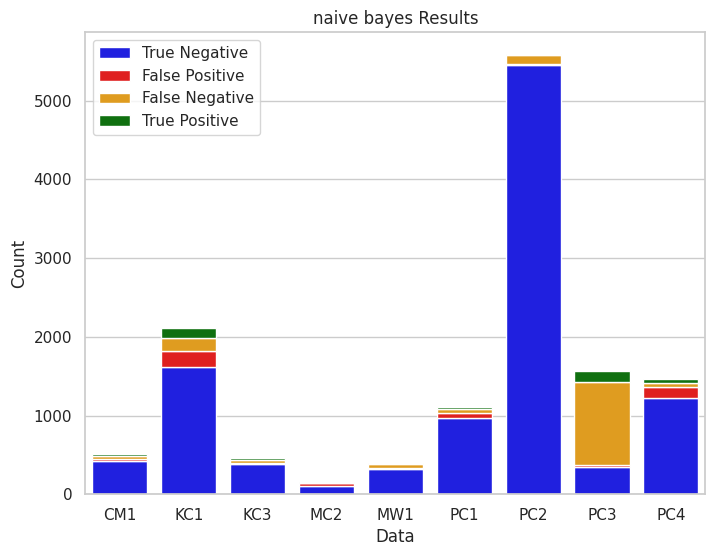

In [ ]:
# prompt: give me naive bayes algorithm on my dataset for defect prediction
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
def naive_bayes(df):
    """
    Perform naive bayes on a dataset.

    Parameters:
    - X: The features where n is the number of modules and m is the number of features.
    - y: The target variable.

    Returns:
    - accuracy: float
        The accuracy of the model.
    - precision: float
        The precision of the model.
    - recall: float
        The recall of the model.
    - f1_score: float
        The f1 score of the model.
    """

    # seperate features and target
    replacements = {'?': -100, 'Y': 1, 'N': 0}
    df = df.replace(replacements)

    target_column = "Defective"

    X = df.drop(target_column, axis=1)  # Features
    y = df['Defective']  # Target variable

    # Create a GaussianNB object
    model = GaussianNB()

    # Fit the model on the training data
    model.fit(X,y)

    # Predict the labels for the test data
    y_pred = model.predict(X)



    # Create a confusion matrix
    cm = confusion_matrix(y , y_pred)


    # # Extract the True Negative, False Positive, False Negative, and True Positive values
    tn, fn, fp, tp = cm.ravel()

    PD = tp / (tp +fn)
    PF = fp / (fp +tn)
    Precision = tp / (tp + fp)
    Recall = tp / (tp + fn)
    f_measure = (2 * Precision * Recall) / (Precision + Recall)
    accuracy = accuracy_score(y, y_pred)


    return tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy

    print("----------------------------------------------- Simple naive bayes Table -----------------------------------------------")

# return value and make Table
tn_list=[]
fn_list=[]
fp_list=[]
tp_list=[]
Table=PrettyTable(["Data","True Negative", "False Positive", "False Negative", "True Positive","PD", "PF", "Precision", "Recall", "f_measure", "accuracy"])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df1)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["CM1",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df2)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["KC1",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df3)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["KC3",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df4)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["MC2",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df5)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["MW1",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df6)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC1",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df7)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC2",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df8)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC3",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
tn, fn, fp, tp, PD, PF, Precision, Recall, f_measure, accuracy = naive_bayes(df9)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC4",tn, fn, fp, tp,PD, PF, Precision, Recall, f_measure, accuracy])
print(Table)

data = {'Data': ['CM1', 'KC1', 'KC3', 'MC2', 'MW1', 'PC1', 'PC2', 'PC3', 'PC4']}
data.update({'True Negative':tn_list})
data.update({'False Negative':fn_list})
data.update({'False Positive':fp_list})
data.update({'True Positive':tp_list})
df = pd.DataFrame(data)


# Plot the table using seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=df, x='Data', y='True Negative', color='blue', label='True Negative')
ax = sns.barplot(data=df, x='Data', y='False Positive', color='red', bottom=df['True Negative'], label='False Positive')
ax = sns.barplot(data=df, x='Data', y='False Negative', color='orange', bottom=df['True Negative']+df['False Positive'], label='False Negative')
ax = sns.barplot(data=df, x='Data', y='True Positive', color='green', bottom=df['True Negative']+df['False Positive']+df['False Negative'], label='True Positive')

plt.xlabel('Data')
plt.ylabel('Count')
plt.title('naive bayes Results')
plt.legend()
plt.show()